In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Zoo.csv")

In [7]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [26]:
data.groupby(['type']).count()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
type,,,,,,,,,,,,,,,,,
1,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
2,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
7,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [52]:
X=np.array(data.iloc[:,1:17].copy())
Y=np.array(data.iloc[:,17:].copy()).ravel()

In [43]:
A=StandardScaler()
X=A.fit_transform(X)

In [44]:

kfold=KFold(n_splits=10)
model= KNeighborsClassifier(n_neighbors=25)
results=cross_val_score(model,X,Y,cv=kfold)
results.mean()

0.7799999999999999

# grid search for algorithm tunning

In [56]:
from sklearn.model_selection import GridSearchCV

In [67]:
A=np.array(range(1,40))
param_grid= dict(n_neighbors=A)

model= KNeighborsClassifier()
grid= GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)

C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [58]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 1}


# visualisation


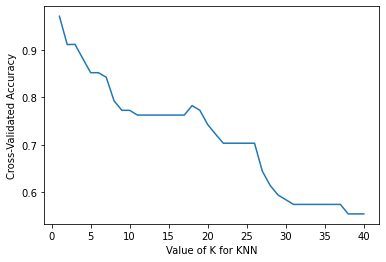

In [70]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# the model has a 96% accuracy 